一、import some package

In [1]:
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils,plot_model
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping,ModelCheckpoint
from keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as mping
import numpy as np
import resnet
import os
import pandas as pd
import random

import pylab
import imageio
imageio.plugins.ffmpeg.download()
import skimage

#from skimage import data, exposure
from skimage.transform import resize
#from skimage.io import imread, imshow, imread_collection, concatenate_images
from sklearn.cross_validation import train_test_split



import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain

import scipy
from keras.models import Model, load_model
from keras.layers import Input,BatchNormalization
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau,CSVLogger
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf




C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


二、读取图片进入X,Y

In [2]:
filename = r'C:\Users\wangpeizhi\Desktop\video2.mov'
vid = imageio.get_reader(filename,  'ffmpeg') 
for im in enumerate(vid):
    if(im[0]%100==0):
        x=im[0]
        print(x)
    length=im[0]+1
print(length)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
17997


In [3]:
print(length)

17997


In [4]:
img_rows=720
img_cols=1280
img_channels=3
nb_classes=10
m=400

filename = r'C:\Users\wangpeizhi\Desktop\video2.mov'
vid = imageio.get_reader(filename,  'ffmpeg') 
X=np.zeros([m,img_rows,img_cols,img_channels])
Y=np.zeros([m,nb_classes])
indice=0
for im in enumerate(vid):
    if(im[0]%45==0)&(indice<m):
        img=im[1]
        #image = resize(img, (img_rows,img_cols), mode='constant', preserve_range=True)
        X[indice,:,:,:]=img
        indice +=1
        print(indice)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [5]:
for j in range(43):
    Y[j,0]=1
for j in range(43,82):
    Y[j,1]=1
for j in range(82,121):
    Y[j,2]=1
for j in range(121,161):
    Y[j,3]=1
for j in range(161,202):
    Y[j,4]=1
for j in range(202,243):
    Y[j,5]=1
for j in range(243,280):
    Y[j,6]=1
for j in range(280,320):
    Y[j,7]=1
Y[320,0]=1
Y[321,1]=1
for j in range(322,361):
    Y[j,8]=1
for j in range(361,400):
    Y[j,9]=1

三、网络的一些超参数

In [6]:
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=10, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.0005, patience=40)
csv_logger = CSVLogger('imagemodel4.1.csv')
checkpointer = ModelCheckpoint('imagemodel4.1.h5', verbose=1, save_best_only=True)
batch_size = 10
nb_epoch = 300
data_augmentation = False

四、预处理，白化

In [7]:
X=X.astype('float32')
mean_X=np.mean(X,axis=0)
X -= mean_X  #白化，X减去所有数据的均值
X /=128 #这样X大概就是在-1~1之间的分布了

五、搭建网络模型，编译

In [8]:
model = resnet.ResnetBuilder.build_resnet_34((img_channels, img_rows,img_cols), nb_classes)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
#plot_model(model, to_file='model V2.0.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 720, 1280, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 360, 640, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 360, 640, 64) 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 360, 640, 64) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

__________________________________________________________________________________________________
add_5 (Add)                     (None, 90, 160, 128) 0           add_4[0][0]                      
                                                                 conv2d_12[0][0]                  
__________________________________________________________________________________________________
batch_normalization_11 (BatchNo (None, 90, 160, 128) 512         add_5[0][0]                      
__________________________________________________________________________________________________
activation_11 (Activation)      (None, 90, 160, 128) 0           batch_normalization_11[0][0]     
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 90, 160, 128) 147584      activation_11[0][0]              
__________________________________________________________________________________________________
batch_norm

__________________________________________________________________________________________________
activation_21 (Activation)      (None, 45, 80, 256)  0           batch_normalization_21[0][0]     
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 45, 80, 256)  590080      activation_21[0][0]              
__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, 45, 80, 256)  1024        conv2d_24[0][0]                  
__________________________________________________________________________________________________
activation_22 (Activation)      (None, 45, 80, 256)  0           batch_normalization_22[0][0]     
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 45, 80, 256)  590080      activation_22[0][0]              
__________

batch_normalization_32 (BatchNo (None, 23, 40, 512)  2048        conv2d_35[0][0]                  
__________________________________________________________________________________________________
activation_32 (Activation)      (None, 23, 40, 512)  0           batch_normalization_32[0][0]     
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 23, 40, 512)  2359808     activation_32[0][0]              
__________________________________________________________________________________________________
add_16 (Add)                    (None, 23, 40, 512)  0           add_15[0][0]                     
                                                                 conv2d_36[0][0]                  
__________________________________________________________________________________________________
batch_normalization_33 (BatchNo (None, 23, 40, 512)  2048        add_16[0][0]                     
__________

六、分割X={X_train,X_val}  Y={Y_train,Y_val}

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15, random_state=42)
print("X_train.shape=",X_train.shape)
print("Y_train.shape=",Y_train.shape)
print("X_val.shape=",X_val.shape)
print("Y_val.shape=",Y_val.shape)

X_train.shape= (340, 720, 1280, 3)
Y_train.shape= (340, 10)
X_val.shape= (60, 720, 1280, 3)
Y_val.shape= (60, 10)


七、数据增强，训练

In [10]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              verbose=1,
              validation_data=(X_val, Y_val),
              shuffle=True,
              callbacks=[lr_reducer,checkpointer, early_stopper, csv_logger])
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=True,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=True,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=False,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=False,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(X_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                        steps_per_epoch=X_train.shape[0] // batch_size,
                        validation_data=(X_val, Y_val),
                        epochs=nb_epoch, verbose=1, max_q_size=100,
                        callbacks=[lr_reducer,checkpointer, early_stopper, csv_logger])


Not using data augmentation.
Train on 340 samples, validate on 60 samples
Epoch 1/300
340/340 [==============================] - ETA: 44:28 - loss: 3.8145 - acc: 0.0000e+ - ETA: 40:48 - loss: 3.6070 - acc: 0.1500   - ETA: 38:57 - loss: 3.5166 - acc: 0.26 - ETA: 38:02 - loss: 3.5476 - acc: 0.27 - ETA: 36:15 - loss: 3.4696 - acc: 0.30 - ETA: 34:41 - loss: 3.4652 - acc: 0.30 - ETA: 33:13 - loss: 3.4516 - acc: 0.30 - ETA: 31:52 - loss: 3.4399 - acc: 0.30 - ETA: 30:32 - loss: 3.4009 - acc: 0.30 - ETA: 29:13 - loss: 3.3719 - acc: 0.31 - ETA: 27:54 - loss: 3.3639 - acc: 0.30 - ETA: 26:38 - loss: 3.3679 - acc: 0.29 - ETA: 25:22 - loss: 3.3398 - acc: 0.30 - ETA: 24:06 - loss: 3.3601 - acc: 0.28 - ETA: 22:51 - loss: 3.3725 - acc: 0.26 - ETA: 21:37 - loss: 3.3623 - acc: 0.27 - ETA: 20:27 - loss: 3.3392 - acc: 0.28 - ETA: 19:13 - loss: 3.3096 - acc: 0.29 - ETA: 17:59 - loss: 3.3048 - acc: 0.29 - ETA: 16:46 - loss: 3.2866 - acc: 0.30 - ETA: 15:33 - loss: 3.2856 - acc: 0.30 - ETA: 14:21 - loss: 3.28

340/340 [==============================] - ETA: 41:04 - loss: 1.2715 - acc: 0.80 - ETA: 39:19 - loss: 1.5751 - acc: 0.75 - ETA: 37:54 - loss: 1.5109 - acc: 0.76 - ETA: 36:38 - loss: 1.4579 - acc: 0.77 - ETA: 35:21 - loss: 1.4192 - acc: 0.78 - ETA: 34:05 - loss: 1.4706 - acc: 0.75 - ETA: 32:51 - loss: 1.4567 - acc: 0.74 - ETA: 31:37 - loss: 1.4956 - acc: 0.75 - ETA: 30:23 - loss: 1.5565 - acc: 0.71 - ETA: 29:11 - loss: 1.5796 - acc: 0.70 - ETA: 27:57 - loss: 1.5988 - acc: 0.70 - ETA: 26:45 - loss: 1.5861 - acc: 0.70 - ETA: 25:32 - loss: 1.5657 - acc: 0.71 - ETA: 24:19 - loss: 1.5552 - acc: 0.72 - ETA: 23:06 - loss: 1.5409 - acc: 0.72 - ETA: 21:53 - loss: 1.5388 - acc: 0.73 - ETA: 20:39 - loss: 1.5261 - acc: 0.73 - ETA: 19:26 - loss: 1.5044 - acc: 0.75 - ETA: 18:13 - loss: 1.5158 - acc: 0.74 - ETA: 17:00 - loss: 1.5038 - acc: 0.75 - ETA: 15:47 - loss: 1.5075 - acc: 0.74 - ETA: 14:34 - loss: 1.5184 - acc: 0.73 - ETA: 13:21 - loss: 1.5182 - acc: 0.73 - ETA: 12:08 - loss: 1.5199 - acc: 0.72

340/340 [==============================] - ETA: 39:57 - loss: 0.6737 - acc: 1.00 - ETA: 39:01 - loss: 0.8743 - acc: 0.80 - ETA: 37:44 - loss: 0.7962 - acc: 0.86 - ETA: 36:28 - loss: 0.8058 - acc: 0.90 - ETA: 35:15 - loss: 0.8205 - acc: 0.92 - ETA: 34:02 - loss: 0.8720 - acc: 0.90 - ETA: 32:52 - loss: 0.8703 - acc: 0.88 - ETA: 31:47 - loss: 0.8946 - acc: 0.87 - ETA: 30:32 - loss: 0.8953 - acc: 0.87 - ETA: 29:19 - loss: 0.8902 - acc: 0.88 - ETA: 28:04 - loss: 0.8752 - acc: 0.89 - ETA: 26:50 - loss: 0.9024 - acc: 0.87 - ETA: 25:36 - loss: 0.9106 - acc: 0.86 - ETA: 24:23 - loss: 0.8937 - acc: 0.87 - ETA: 23:09 - loss: 0.8848 - acc: 0.87 - ETA: 21:55 - loss: 0.8866 - acc: 0.87 - ETA: 20:42 - loss: 0.8943 - acc: 0.87 - ETA: 19:29 - loss: 0.9165 - acc: 0.85 - ETA: 18:16 - loss: 0.9258 - acc: 0.84 - ETA: 17:05 - loss: 0.9202 - acc: 0.85 - ETA: 15:51 - loss: 0.9317 - acc: 0.84 - ETA: 14:38 - loss: 0.9284 - acc: 0.85 - ETA: 13:25 - loss: 0.9302 - acc: 0.85 - ETA: 12:11 - loss: 0.9230 - acc: 0.85

340/340 [==============================] - ETA: 39:52 - loss: 0.6924 - acc: 0.90 - ETA: 38:49 - loss: 0.7642 - acc: 0.90 - ETA: 37:32 - loss: 0.7007 - acc: 0.93 - ETA: 36:15 - loss: 0.7041 - acc: 0.92 - ETA: 35:04 - loss: 0.7667 - acc: 0.88 - ETA: 33:49 - loss: 0.7268 - acc: 0.90 - ETA: 32:37 - loss: 0.7152 - acc: 0.90 - ETA: 31:24 - loss: 0.7052 - acc: 0.91 - ETA: 30:12 - loss: 0.6839 - acc: 0.92 - ETA: 28:59 - loss: 0.6710 - acc: 0.93 - ETA: 27:46 - loss: 0.6757 - acc: 0.92 - ETA: 26:33 - loss: 0.7076 - acc: 0.90 - ETA: 25:20 - loss: 0.6976 - acc: 0.90 - ETA: 24:07 - loss: 0.6882 - acc: 0.91 - ETA: 22:59 - loss: 0.6832 - acc: 0.92 - ETA: 21:46 - loss: 0.6982 - acc: 0.91 - ETA: 20:33 - loss: 0.6940 - acc: 0.91 - ETA: 19:20 - loss: 0.6970 - acc: 0.91 - ETA: 18:07 - loss: 0.6950 - acc: 0.91 - ETA: 16:55 - loss: 0.6879 - acc: 0.92 - ETA: 15:42 - loss: 0.6828 - acc: 0.92 - ETA: 14:30 - loss: 0.6796 - acc: 0.92 - ETA: 13:17 - loss: 0.6753 - acc: 0.92 - ETA: 12:05 - loss: 0.6831 - acc: 0.92

340/340 [==============================] - ETA: 39:28 - loss: 0.7104 - acc: 0.90 - ETA: 38:29 - loss: 0.8119 - acc: 0.85 - ETA: 37:21 - loss: 0.7256 - acc: 0.86 - ETA: 36:15 - loss: 0.6818 - acc: 0.90 - ETA: 35:08 - loss: 0.6628 - acc: 0.92 - ETA: 33:56 - loss: 0.6571 - acc: 0.93 - ETA: 32:43 - loss: 0.6392 - acc: 0.94 - ETA: 31:30 - loss: 0.6482 - acc: 0.93 - ETA: 30:17 - loss: 0.7136 - acc: 0.91 - ETA: 29:03 - loss: 0.7054 - acc: 0.91 - ETA: 27:51 - loss: 0.6892 - acc: 0.91 - ETA: 26:38 - loss: 0.7501 - acc: 0.88 - ETA: 25:26 - loss: 0.7408 - acc: 0.89 - ETA: 24:13 - loss: 0.7460 - acc: 0.89 - ETA: 23:00 - loss: 0.7441 - acc: 0.89 - ETA: 21:47 - loss: 0.7297 - acc: 0.90 - ETA: 20:38 - loss: 0.7480 - acc: 0.89 - ETA: 19:25 - loss: 0.7399 - acc: 0.88 - ETA: 18:12 - loss: 0.7277 - acc: 0.89 - ETA: 16:59 - loss: 0.7214 - acc: 0.89 - ETA: 15:46 - loss: 0.7104 - acc: 0.90 - ETA: 14:33 - loss: 0.7079 - acc: 0.90 - ETA: 13:20 - loss: 0.7051 - acc: 0.90 - ETA: 12:07 - loss: 0.7240 - acc: 0.90

340/340 [==============================] - ETA: 39:39 - loss: 0.7117 - acc: 0.90 - ETA: 38:29 - loss: 0.6312 - acc: 0.90 - ETA: 37:20 - loss: 0.7827 - acc: 0.90 - ETA: 36:10 - loss: 0.7940 - acc: 0.87 - ETA: 34:59 - loss: 0.7154 - acc: 0.90 - ETA: 33:47 - loss: 0.6992 - acc: 0.90 - ETA: 32:36 - loss: 0.7113 - acc: 0.90 - ETA: 31:24 - loss: 0.6864 - acc: 0.90 - ETA: 30:13 - loss: 0.6754 - acc: 0.90 - ETA: 28:59 - loss: 0.6590 - acc: 0.91 - ETA: 27:47 - loss: 0.6429 - acc: 0.91 - ETA: 26:46 - loss: 0.6446 - acc: 0.91 - ETA: 25:32 - loss: 0.6451 - acc: 0.91 - ETA: 24:19 - loss: 0.6312 - acc: 0.92 - ETA: 23:11 - loss: 0.6762 - acc: 0.90 - ETA: 22:06 - loss: 0.6775 - acc: 0.89 - ETA: 21:46 - loss: 0.6699 - acc: 0.90 - ETA: 20:42 - loss: 0.6635 - acc: 0.90 - ETA: 19:20 - loss: 0.6639 - acc: 0.90 - ETA: 18:00 - loss: 0.6562 - acc: 0.90 - ETA: 16:40 - loss: 0.6439 - acc: 0.90 - ETA: 15:21 - loss: 0.6391 - acc: 0.91 - ETA: 14:05 - loss: 0.6303 - acc: 0.91 - ETA: 12:49 - loss: 0.6335 - acc: 0.91

340/340 [==============================] - ETA: 43:12 - loss: 0.3952 - acc: 1.00 - ETA: 40:38 - loss: 0.5012 - acc: 1.00 - ETA: 39:31 - loss: 0.4691 - acc: 1.00 - ETA: 38:55 - loss: 0.4573 - acc: 1.00 - ETA: 38:13 - loss: 0.4628 - acc: 1.00 - ETA: 36:59 - loss: 0.4626 - acc: 1.00 - ETA: 35:35 - loss: 0.4462 - acc: 1.00 - ETA: 34:11 - loss: 0.4498 - acc: 1.00 - ETA: 32:44 - loss: 0.4532 - acc: 1.00 - ETA: 31:25 - loss: 0.4597 - acc: 0.99 - ETA: 29:55 - loss: 0.4523 - acc: 0.99 - ETA: 28:34 - loss: 0.4461 - acc: 0.99 - ETA: 27:13 - loss: 0.4447 - acc: 0.99 - ETA: 25:54 - loss: 0.4589 - acc: 0.97 - ETA: 24:33 - loss: 0.4639 - acc: 0.97 - ETA: 23:13 - loss: 0.4629 - acc: 0.97 - ETA: 21:54 - loss: 0.4678 - acc: 0.97 - ETA: 20:35 - loss: 0.4725 - acc: 0.96 - ETA: 19:21 - loss: 0.4739 - acc: 0.96 - ETA: 18:05 - loss: 0.4684 - acc: 0.97 - ETA: 16:51 - loss: 0.4767 - acc: 0.96 - ETA: 15:36 - loss: 0.4756 - acc: 0.96 - ETA: 14:18 - loss: 0.4717 - acc: 0.96 - ETA: 13:01 - loss: 0.4672 - acc: 0.97

340/340 [==============================] - ETA: 40:09 - loss: 0.2881 - acc: 1.00 - ETA: 39:02 - loss: 0.2981 - acc: 1.00 - ETA: 37:45 - loss: 0.2971 - acc: 1.00 - ETA: 36:28 - loss: 0.2943 - acc: 1.00 - ETA: 35:17 - loss: 0.3001 - acc: 1.00 - ETA: 34:01 - loss: 0.2963 - acc: 1.00 - ETA: 32:48 - loss: 0.2987 - acc: 1.00 - ETA: 31:35 - loss: 0.2971 - acc: 1.00 - ETA: 30:21 - loss: 0.3029 - acc: 1.00 - ETA: 29:07 - loss: 0.3014 - acc: 1.00 - ETA: 27:54 - loss: 0.3120 - acc: 1.00 - ETA: 26:46 - loss: 0.3135 - acc: 1.00 - ETA: 25:32 - loss: 0.3136 - acc: 1.00 - ETA: 24:19 - loss: 0.3119 - acc: 1.00 - ETA: 23:06 - loss: 0.3086 - acc: 1.00 - ETA: 21:53 - loss: 0.3173 - acc: 0.99 - ETA: 20:39 - loss: 0.3195 - acc: 0.98 - ETA: 19:26 - loss: 0.3178 - acc: 0.98 - ETA: 18:14 - loss: 0.3234 - acc: 0.98 - ETA: 17:01 - loss: 0.3256 - acc: 0.98 - ETA: 15:48 - loss: 0.3279 - acc: 0.98 - ETA: 14:35 - loss: 0.3260 - acc: 0.98 - ETA: 13:22 - loss: 0.3266 - acc: 0.98 - ETA: 12:10 - loss: 0.3258 - acc: 0.98

340/340 [==============================] - ETA: 39:49 - loss: 0.3515 - acc: 1.00 - ETA: 38:49 - loss: 0.4194 - acc: 0.95 - ETA: 37:42 - loss: 0.3938 - acc: 0.96 - ETA: 36:36 - loss: 0.3901 - acc: 0.97 - ETA: 35:21 - loss: 0.3865 - acc: 0.98 - ETA: 34:17 - loss: 0.4387 - acc: 0.96 - ETA: 33:00 - loss: 0.4236 - acc: 0.97 - ETA: 31:45 - loss: 0.4163 - acc: 0.97 - ETA: 30:30 - loss: 0.4080 - acc: 0.97 - ETA: 29:15 - loss: 0.4029 - acc: 0.98 - ETA: 28:01 - loss: 0.4016 - acc: 0.98 - ETA: 26:47 - loss: 0.4023 - acc: 0.98 - ETA: 25:34 - loss: 0.3958 - acc: 0.98 - ETA: 24:21 - loss: 0.3949 - acc: 0.98 - ETA: 23:07 - loss: 0.3922 - acc: 0.98 - ETA: 21:54 - loss: 0.4130 - acc: 0.97 - ETA: 20:41 - loss: 0.4106 - acc: 0.97 - ETA: 19:28 - loss: 0.4133 - acc: 0.97 - ETA: 18:15 - loss: 0.4083 - acc: 0.97 - ETA: 17:02 - loss: 0.4037 - acc: 0.97 - ETA: 15:49 - loss: 0.4004 - acc: 0.97 - ETA: 14:36 - loss: 0.3966 - acc: 0.97 - ETA: 13:23 - loss: 0.4010 - acc: 0.97 - ETA: 12:09 - loss: 0.3981 - acc: 0.97

340/340 [==============================] - ETA: 40:35 - loss: 0.3147 - acc: 1.00 - ETA: 39:08 - loss: 0.3058 - acc: 1.00 - ETA: 37:56 - loss: 0.3323 - acc: 1.00 - ETA: 36:37 - loss: 0.3465 - acc: 0.97 - ETA: 35:19 - loss: 0.3317 - acc: 0.98 - ETA: 34:04 - loss: 0.3199 - acc: 0.98 - ETA: 32:50 - loss: 0.3117 - acc: 0.98 - ETA: 31:35 - loss: 0.3096 - acc: 0.98 - ETA: 30:23 - loss: 0.3062 - acc: 0.98 - ETA: 29:09 - loss: 0.3118 - acc: 0.99 - ETA: 27:57 - loss: 0.3085 - acc: 0.99 - ETA: 26:43 - loss: 0.3062 - acc: 0.99 - ETA: 25:37 - loss: 0.3029 - acc: 0.99 - ETA: 24:23 - loss: 0.3024 - acc: 0.99 - ETA: 23:09 - loss: 0.2999 - acc: 0.99 - ETA: 21:56 - loss: 0.2984 - acc: 0.99 - ETA: 20:42 - loss: 0.3027 - acc: 0.98 - ETA: 19:29 - loss: 0.3008 - acc: 0.98 - ETA: 18:16 - loss: 0.2985 - acc: 0.98 - ETA: 17:03 - loss: 0.2975 - acc: 0.99 - ETA: 15:49 - loss: 0.2972 - acc: 0.99 - ETA: 14:36 - loss: 0.2975 - acc: 0.99 - ETA: 13:23 - loss: 0.2962 - acc: 0.99 - ETA: 12:10 - loss: 0.2956 - acc: 0.99

340/340 [==============================] - ETA: 38:12 - loss: 0.2216 - acc: 1.00 - ETA: 37:01 - loss: 0.2233 - acc: 1.00 - ETA: 35:53 - loss: 0.2275 - acc: 1.00 - ETA: 34:46 - loss: 0.2265 - acc: 1.00 - ETA: 33:37 - loss: 0.2257 - acc: 1.00 - ETA: 32:30 - loss: 0.2260 - acc: 1.00 - ETA: 31:20 - loss: 0.2260 - acc: 1.00 - ETA: 30:10 - loss: 0.2254 - acc: 1.00 - ETA: 29:00 - loss: 0.2252 - acc: 1.00 - ETA: 27:50 - loss: 0.2249 - acc: 1.00 - ETA: 26:42 - loss: 0.2282 - acc: 1.00 - ETA: 25:33 - loss: 0.2285 - acc: 1.00 - ETA: 24:26 - loss: 0.2287 - acc: 1.00 - ETA: 23:16 - loss: 0.2296 - acc: 1.00 - ETA: 22:06 - loss: 0.2300 - acc: 1.00 - ETA: 20:56 - loss: 0.2353 - acc: 1.00 - ETA: 19:45 - loss: 0.2351 - acc: 1.00 - ETA: 18:36 - loss: 0.2347 - acc: 1.00 - ETA: 17:26 - loss: 0.2341 - acc: 1.00 - ETA: 16:16 - loss: 0.2344 - acc: 1.00 - ETA: 15:06 - loss: 0.2339 - acc: 1.00 - ETA: 13:56 - loss: 0.2343 - acc: 1.00 - ETA: 12:47 - loss: 0.2338 - acc: 1.00 - ETA: 11:37 - loss: 0.2333 - acc: 1.00

340/340 [==============================] - ETA: 38:19 - loss: 0.2049 - acc: 1.00 - ETA: 37:09 - loss: 0.2066 - acc: 1.00 - ETA: 36:01 - loss: 0.2074 - acc: 1.00 - ETA: 34:50 - loss: 0.2065 - acc: 1.00 - ETA: 33:41 - loss: 0.2069 - acc: 1.00 - ETA: 32:31 - loss: 0.2085 - acc: 1.00 - ETA: 31:33 - loss: 0.2084 - acc: 1.00 - ETA: 30:22 - loss: 0.2078 - acc: 1.00 - ETA: 29:11 - loss: 0.2095 - acc: 1.00 - ETA: 28:00 - loss: 0.2095 - acc: 1.00 - ETA: 26:49 - loss: 0.2092 - acc: 1.00 - ETA: 25:38 - loss: 0.2092 - acc: 1.00 - ETA: 24:28 - loss: 0.2100 - acc: 1.00 - ETA: 23:17 - loss: 0.2099 - acc: 1.00 - ETA: 22:07 - loss: 0.2102 - acc: 1.00 - ETA: 20:57 - loss: 0.2119 - acc: 1.00 - ETA: 19:48 - loss: 0.2114 - acc: 1.00 - ETA: 18:38 - loss: 0.2112 - acc: 1.00 - ETA: 17:28 - loss: 0.2110 - acc: 1.00 - ETA: 16:20 - loss: 0.2107 - acc: 1.00 - ETA: 15:10 - loss: 0.2109 - acc: 1.00 - ETA: 13:59 - loss: 0.2109 - acc: 1.00 - ETA: 12:49 - loss: 0.2106 - acc: 1.00 - ETA: 11:39 - loss: 0.2109 - acc: 1.00

340/340 [==============================] - ETA: 38:17 - loss: 0.2015 - acc: 1.00 - ETA: 37:07 - loss: 0.1984 - acc: 1.00 - ETA: 35:59 - loss: 0.1986 - acc: 1.00 - ETA: 34:53 - loss: 0.1985 - acc: 1.00 - ETA: 33:46 - loss: 0.1979 - acc: 1.00 - ETA: 32:37 - loss: 0.1985 - acc: 1.00 - ETA: 31:27 - loss: 0.1983 - acc: 1.00 - ETA: 30:17 - loss: 0.1983 - acc: 1.00 - ETA: 29:15 - loss: 0.1980 - acc: 1.00 - ETA: 28:03 - loss: 0.1978 - acc: 1.00 - ETA: 26:53 - loss: 0.1977 - acc: 1.00 - ETA: 25:42 - loss: 0.1986 - acc: 1.00 - ETA: 24:32 - loss: 0.1990 - acc: 1.00 - ETA: 23:22 - loss: 0.1990 - acc: 1.00 - ETA: 22:11 - loss: 0.1990 - acc: 1.00 - ETA: 21:01 - loss: 0.1993 - acc: 1.00 - ETA: 19:50 - loss: 0.1991 - acc: 1.00 - ETA: 18:40 - loss: 0.1989 - acc: 1.00 - ETA: 17:30 - loss: 0.2001 - acc: 1.00 - ETA: 16:20 - loss: 0.2002 - acc: 1.00 - ETA: 15:09 - loss: 0.1999 - acc: 1.00 - ETA: 14:00 - loss: 0.1999 - acc: 1.00 - ETA: 12:50 - loss: 0.1997 - acc: 1.00 - ETA: 11:40 - loss: 0.1998 - acc: 1.00

340/340 [==============================] - ETA: 45:07 - loss: 0.1883 - acc: 1.00 - ETA: 43:56 - loss: 0.1903 - acc: 1.00 - ETA: 42:59 - loss: 0.1897 - acc: 1.00 - ETA: 41:40 - loss: 0.1889 - acc: 1.00 - ETA: 39:30 - loss: 0.1890 - acc: 1.00 - ETA: 37:34 - loss: 0.1889 - acc: 1.00 - ETA: 36:01 - loss: 0.1887 - acc: 1.00 - ETA: 34:40 - loss: 0.1885 - acc: 1.00 - ETA: 33:15 - loss: 0.1884 - acc: 1.00 - ETA: 31:40 - loss: 0.1888 - acc: 1.00 - ETA: 30:37 - loss: 0.1888 - acc: 1.00 - ETA: 29:39 - loss: 0.1894 - acc: 1.00 - ETA: 28:30 - loss: 0.1895 - acc: 1.00 - ETA: 27:18 - loss: 0.1899 - acc: 1.00 - ETA: 26:03 - loss: 0.1898 - acc: 1.00 - ETA: 24:49 - loss: 0.1899 - acc: 1.00 - ETA: 23:31 - loss: 0.1898 - acc: 1.00 - ETA: 22:04 - loss: 0.1900 - acc: 1.00 - ETA: 20:37 - loss: 0.1900 - acc: 1.00 - ETA: 19:10 - loss: 0.1899 - acc: 1.00 - ETA: 17:47 - loss: 0.1898 - acc: 1.00 - ETA: 16:20 - loss: 0.1896 - acc: 1.00 - ETA: 14:53 - loss: 0.1897 - acc: 1.00 - ETA: 13:28 - loss: 0.1895 - acc: 1.00

340/340 [==============================] - ETA: 39:46 - loss: 0.1813 - acc: 1.00 - ETA: 38:24 - loss: 0.1855 - acc: 1.00 - ETA: 37:06 - loss: 0.1839 - acc: 1.00 - ETA: 35:52 - loss: 0.1843 - acc: 1.00 - ETA: 34:55 - loss: 0.1835 - acc: 1.00 - ETA: 33:39 - loss: 0.1833 - acc: 1.00 - ETA: 32:25 - loss: 0.1835 - acc: 1.00 - ETA: 31:12 - loss: 0.1832 - acc: 1.00 - ETA: 29:59 - loss: 0.1835 - acc: 1.00 - ETA: 28:45 - loss: 0.1850 - acc: 1.00 - ETA: 27:32 - loss: 0.1846 - acc: 1.00 - ETA: 26:20 - loss: 0.1844 - acc: 1.00 - ETA: 25:07 - loss: 0.1843 - acc: 1.00 - ETA: 23:55 - loss: 0.1839 - acc: 1.00 - ETA: 22:43 - loss: 0.1837 - acc: 1.00 - ETA: 21:31 - loss: 0.1834 - acc: 1.00 - ETA: 20:19 - loss: 0.1854 - acc: 1.00 - ETA: 19:12 - loss: 0.1852 - acc: 1.00 - ETA: 17:59 - loss: 0.1851 - acc: 1.00 - ETA: 16:47 - loss: 0.1849 - acc: 1.00 - ETA: 15:35 - loss: 0.1847 - acc: 1.00 - ETA: 14:22 - loss: 0.1846 - acc: 1.00 - ETA: 13:10 - loss: 0.1847 - acc: 1.00 - ETA: 11:58 - loss: 0.1844 - acc: 1.00

340/340 [==============================] - ETA: 39:34 - loss: 0.1743 - acc: 1.00 - ETA: 38:58 - loss: 0.1748 - acc: 1.00 - ETA: 37:30 - loss: 0.1744 - acc: 1.00 - ETA: 36:13 - loss: 0.1748 - acc: 1.00 - ETA: 34:57 - loss: 0.1752 - acc: 1.00 - ETA: 33:42 - loss: 0.1764 - acc: 1.00 - ETA: 32:28 - loss: 0.1767 - acc: 1.00 - ETA: 31:15 - loss: 0.1767 - acc: 1.00 - ETA: 30:01 - loss: 0.1772 - acc: 1.00 - ETA: 28:49 - loss: 0.1770 - acc: 1.00 - ETA: 27:35 - loss: 0.1768 - acc: 1.00 - ETA: 26:23 - loss: 0.1767 - acc: 1.00 - ETA: 25:11 - loss: 0.1766 - acc: 1.00 - ETA: 23:59 - loss: 0.1764 - acc: 1.00 - ETA: 22:50 - loss: 0.1772 - acc: 1.00 - ETA: 21:38 - loss: 0.1771 - acc: 1.00 - ETA: 20:26 - loss: 0.1780 - acc: 1.00 - ETA: 19:13 - loss: 0.1778 - acc: 1.00 - ETA: 18:01 - loss: 0.1784 - acc: 1.00 - ETA: 16:49 - loss: 0.1782 - acc: 1.00 - ETA: 15:36 - loss: 0.1782 - acc: 1.00 - ETA: 14:24 - loss: 0.1780 - acc: 1.00 - ETA: 13:12 - loss: 0.1780 - acc: 1.00 - ETA: 11:59 - loss: 0.1779 - acc: 1.00

340/340 [==============================] - ETA: 39:24 - loss: 0.1752 - acc: 1.00 - ETA: 38:18 - loss: 0.1743 - acc: 1.00 - ETA: 37:06 - loss: 0.1743 - acc: 1.00 - ETA: 35:57 - loss: 0.1738 - acc: 1.00 - ETA: 34:49 - loss: 0.1738 - acc: 1.00 - ETA: 33:39 - loss: 0.1735 - acc: 1.00 - ETA: 32:24 - loss: 0.1734 - acc: 1.00 - ETA: 31:14 - loss: 0.1737 - acc: 1.00 - ETA: 30:02 - loss: 0.1737 - acc: 1.00 - ETA: 28:49 - loss: 0.1735 - acc: 1.00 - ETA: 27:41 - loss: 0.1734 - acc: 1.00 - ETA: 26:28 - loss: 0.1738 - acc: 1.00 - ETA: 25:15 - loss: 0.1736 - acc: 1.00 - ETA: 24:03 - loss: 0.1735 - acc: 1.00 - ETA: 22:50 - loss: 0.1735 - acc: 1.00 - ETA: 21:38 - loss: 0.1734 - acc: 1.00 - ETA: 20:25 - loss: 0.1733 - acc: 1.00 - ETA: 19:13 - loss: 0.1732 - acc: 1.00 - ETA: 18:01 - loss: 0.1731 - acc: 1.00 - ETA: 16:49 - loss: 0.1734 - acc: 1.00 - ETA: 15:37 - loss: 0.1734 - acc: 1.00 - ETA: 14:24 - loss: 0.1733 - acc: 1.00 - ETA: 13:12 - loss: 0.1735 - acc: 1.00 - ETA: 12:01 - loss: 0.1734 - acc: 1.00

340/340 [==============================] - ETA: 39:37 - loss: 0.1745 - acc: 1.00 - ETA: 38:19 - loss: 0.1725 - acc: 1.00 - ETA: 37:41 - loss: 0.1721 - acc: 1.00 - ETA: 36:17 - loss: 0.1714 - acc: 1.00 - ETA: 35:00 - loss: 0.1713 - acc: 1.00 - ETA: 33:43 - loss: 0.1711 - acc: 1.00 - ETA: 32:28 - loss: 0.1715 - acc: 1.00 - ETA: 31:13 - loss: 0.1713 - acc: 1.00 - ETA: 29:59 - loss: 0.1712 - acc: 1.00 - ETA: 28:58 - loss: 0.1713 - acc: 1.00 - ETA: 27:58 - loss: 0.1714 - acc: 1.00 - ETA: 26:55 - loss: 0.1713 - acc: 1.00 - ETA: 25:44 - loss: 0.1714 - acc: 1.00 - ETA: 24:28 - loss: 0.1713 - acc: 1.00 - ETA: 23:14 - loss: 0.1717 - acc: 1.00 - ETA: 21:59 - loss: 0.1716 - acc: 1.00 - ETA: 20:44 - loss: 0.1715 - acc: 1.00 - ETA: 19:30 - loss: 0.1716 - acc: 1.00 - ETA: 18:17 - loss: 0.1718 - acc: 1.00 - ETA: 17:02 - loss: 0.1718 - acc: 1.00 - ETA: 15:49 - loss: 0.1717 - acc: 1.00 - ETA: 14:35 - loss: 0.1716 - acc: 1.00 - ETA: 13:22 - loss: 0.1718 - acc: 1.00 - ETA: 12:08 - loss: 0.1717 - acc: 1.00

340/340 [==============================] - ETA: 39:08 - loss: 0.1688 - acc: 1.00 - ETA: 37:58 - loss: 0.1692 - acc: 1.00 - ETA: 36:48 - loss: 0.1697 - acc: 1.00 - ETA: 35:57 - loss: 0.1695 - acc: 1.00 - ETA: 34:40 - loss: 0.1695 - acc: 1.00 - ETA: 33:25 - loss: 0.1702 - acc: 1.00 - ETA: 32:11 - loss: 0.1700 - acc: 1.00 - ETA: 30:59 - loss: 0.1700 - acc: 1.00 - ETA: 29:46 - loss: 0.1699 - acc: 1.00 - ETA: 28:35 - loss: 0.1698 - acc: 1.00 - ETA: 27:24 - loss: 0.1699 - acc: 1.00 - ETA: 26:12 - loss: 0.1698 - acc: 1.00 - ETA: 25:00 - loss: 0.1698 - acc: 1.00 - ETA: 23:48 - loss: 0.1698 - acc: 1.00 - ETA: 22:36 - loss: 0.1699 - acc: 1.00 - ETA: 21:26 - loss: 0.1701 - acc: 1.00 - ETA: 20:14 - loss: 0.1701 - acc: 1.00 - ETA: 19:03 - loss: 0.1700 - acc: 1.00 - ETA: 17:51 - loss: 0.1700 - acc: 1.00 - ETA: 16:39 - loss: 0.1732 - acc: 1.00 - ETA: 15:28 - loss: 0.1730 - acc: 1.00 - ETA: 14:16 - loss: 0.1728 - acc: 1.00 - ETA: 13:05 - loss: 0.1727 - acc: 1.00 - ETA: 11:53 - loss: 0.1726 - acc: 1.00

340/340 [==============================] - ETA: 39:02 - loss: 0.1689 - acc: 1.00 - ETA: 38:56 - loss: 0.1732 - acc: 1.00 - ETA: 37:15 - loss: 0.1717 - acc: 1.00 - ETA: 35:56 - loss: 0.1710 - acc: 1.00 - ETA: 34:42 - loss: 0.1706 - acc: 1.00 - ETA: 33:25 - loss: 0.1705 - acc: 1.00 - ETA: 32:10 - loss: 0.1703 - acc: 1.00 - ETA: 30:56 - loss: 0.1700 - acc: 1.00 - ETA: 29:43 - loss: 0.1700 - acc: 1.00 - ETA: 28:31 - loss: 0.1702 - acc: 1.00 - ETA: 27:19 - loss: 0.1700 - acc: 1.00 - ETA: 26:07 - loss: 0.1700 - acc: 1.00 - ETA: 24:55 - loss: 0.1701 - acc: 1.00 - ETA: 23:43 - loss: 0.1701 - acc: 1.00 - ETA: 22:34 - loss: 0.1700 - acc: 1.00 - ETA: 21:22 - loss: 0.1699 - acc: 1.00 - ETA: 20:10 - loss: 0.1698 - acc: 1.00 - ETA: 18:59 - loss: 0.1698 - acc: 1.00 - ETA: 17:47 - loss: 0.1698 - acc: 1.00 - ETA: 16:36 - loss: 0.1698 - acc: 1.00 - ETA: 15:24 - loss: 0.1697 - acc: 1.00 - ETA: 14:13 - loss: 0.1696 - acc: 1.00 - ETA: 13:02 - loss: 0.1696 - acc: 1.00 - ETA: 11:50 - loss: 0.1696 - acc: 1.00

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-6174c9e43021>", line 9, in <module>
    callbacks=[lr_reducer,checkpointer, early_stopper, csv_logger])
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1712, in fit
    validation_steps=validation_steps)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1235, in _fit_loop
    outs = f(ins_batch)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py", line 2475, in __call__
    **self.session_kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py", line 895, in run
    run_metadata_ptr)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py", line 1128, in _run
    feed_dict_tensor, options, run_m

KeyboardInterrupt: 

八、测试

In [11]:
for im in enumerate(vid):
    len_video=im[0]+1
print(len_video)

17997


In [35]:
model = load_model('imagemodel4.1.h5')
#del X
#del PRED
#del pred
PRED=np.zeros([len_video,1])
sample=np.zeros([1,img_rows,img_cols,img_channels])
indice=0
for im in enumerate(vid):
    sample[0,:,:,:]=im[1]
    sample -=mean_X
    sample /= 128
    pred=model.predict(sample)
    PRED[indice]=np.argmax(pred)
    #print(PRED[indice])
    indice +=1
np.save('PRED',PRED)

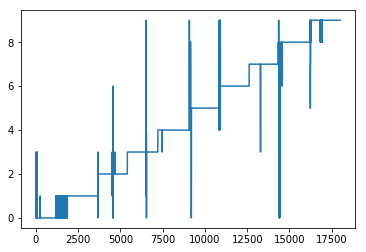

In [13]:
plt.plot(PRED)
plt.show()


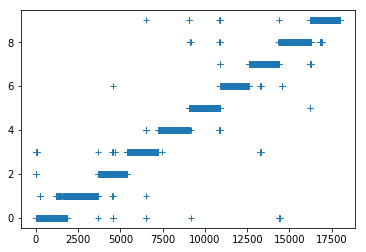

In [21]:
plt.plot(PRED,'+')
plt.show()

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




10820
10821
10822
10823
10824
10825
10826
10827
10828
10829
10830
10831
10832
10833
10834
10835
10836
10837
10838
10839
10840
10841
10842
10843
10844
10845
10846
10847
10848
10849
10850
10851
10852
10853
10854
10855
10856
10857
10858
10859
10860
10861
10862
10863
10864
10865
10866
10867
10868
10869
10870
10871
10872
10873
10874
10875
10876
10877
10878
10879
10880
10881
10882
10883
10884
10885
10886
10887
10888
10889
10890
10891
10892
10893
10894
10895
10896
10897
10898
10899
10900
10901
10902
10903
10904
10905
10906
10907
10908
10909
10910
10911
10912
10913
10914
10915
10916
10917
10918
10919
10920
10921
10922
10923
10924
10925
10926
10927
10928
10929
10930
10931
10932
10933
10934
10935
10936
10937
10938
10939
10940
10941
10942
10943
10944
10945
10946
10947
10948
10949
10950
10951
10952
10953
10954
10955
10956
10957
10958
10959
10960
10961
10962
10963
10964
10965
10966
10967
10968
10969
10970
10971
10972
10973
10974
10975
10976
10977
10978
10979
10980
10981
10982
10983
10984
10985
109

13820
13821
13822
13823
13824
13825
13826
13827
13828
13829
13830
13831
13832
13833
13834
13835
13836
13837
13838
13839
13840
13841
13842
13843
13844
13845
13846
13847
13848
13849
13850
13851
13852
13853
13854
13855
13856
13857
13858
13859
13860
13861
13862
13863
13864
13865
13866
13867
13868
13869
13870
13871
13872
13873
13874
13875
13876
13877
13878
13879
13880
13881
13882
13883
13884
13885
13886
13887
13888
13889
13890
13891
13892
13893
13894
13895
13896
13897
13898
13899
13900
13901
13902
13903
13904
13905
13906
13907
13908
13909
13910
13911
13912
13913
13914
13915
13916
13917
13918
13919
13920
13921
13922
13923
13924
13925
13926
13927
13928
13929
13930
13931
13932
13933
13934
13935
13936
13937
13938
13939
13940
13941
13942
13943
13944
13945
13946
13947
13948
13949
13950
13951
13952
13953


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
15751
15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
15777
15778
15779
15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
15793
15794
15795
15796
15797
15798
15799
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
15813
15814
15815
15816
15817
15818
15819
15820
15821
15822
15823
15824
15825
15826
15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
15840
15841
15842
15843
15844
15845
15846
15847
15848
15849
15850
15851
15852
15853
15854
15855
15856
15857
15858
15859
15860
15861
15862
15863
15864
15865
15866
15867
15868
15869
15870
15871
15872
15873
15874
15875
15876
15877
15878
15879
15880
15881
15882
15883
15884
15885
15886
15887
15888
15889
15890
15891
15892
15893
15894
15895
15896
158

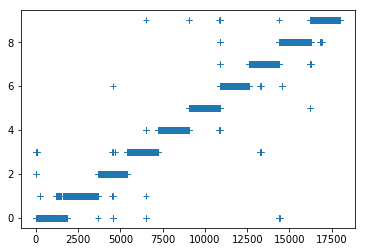

In [28]:
for J in range(3,17994):
    print(J)
    if PRED[J-3]==PRED[J-2] and PRED[J-2]==PRED[J-1] and PRED[J-1]==PRED[J+1] and PRED[J+1]==PRED[J+2] and PRED[J+2]==PRED[J+3]:
        PRED[J]=PRED[J-1]
plt.plot(PRED,'+')
plt.show()

In [30]:
np.save('a.txt',PRED)

In [32]:
b=np.load('a.txt.npy')

In [34]:
print(b.shape)

(17997, 1)


In [ ]:
print(X[0].shape)

In [ ]:
plt.plot(pred)

相比如V1.0版本，这里把resnet18改成了resnet34

In [ ]:
def mapmaxmin(x):
    MIN=np.min(x)
    MAX=np.max(x)
    return (x-MIN)/(MAX-MIN)